Aprendizado Não Supervisionado - CLUSTERING / AGRUPAMENTO

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dados_teste = pd.read_csv('/content/household_power_consumption_16.csv')

In [ ]:
dados_teste = dados_teste.drop(0, axis=0)

In [ ]:
dados_teste = dados_teste.drop(1, axis=0)

In [ ]:
dados_teste_para_converter = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

dados_teste[dados_teste_para_converter] = dados_teste[dados_teste_para_converter].astype(float)

In [ ]:
distorcoes = []
K = range(1,10)
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(dados_teste)
    distorcoes.append(modelo01.inertia_)

In [ ]:
distorcoes

[22489430.656321503,
 12355986.460239451,
 7525468.72806783,
 3928672.5346631883,
 3484500.9992074994,
 3100660.412094497,
 2834678.635647638,
 2588873.758887326,
 2323782.625154205]

Observando a Curva de Elbow

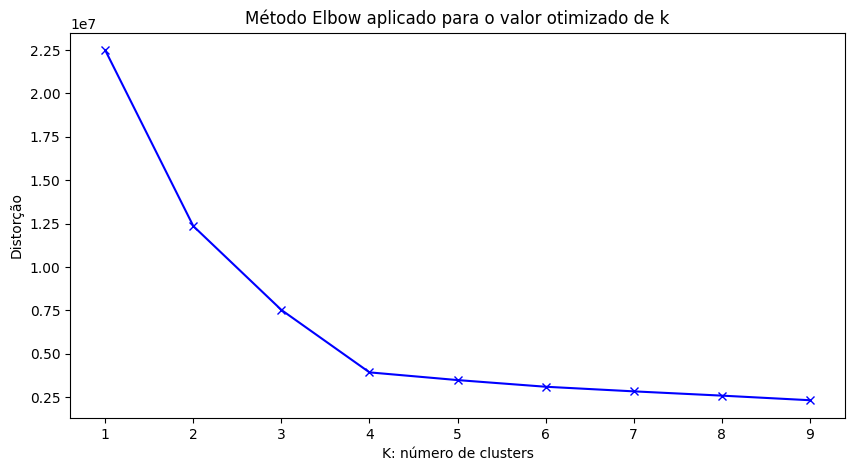

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

plt.title('Método Elbow aplicado para o valor otimizado de k')

plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(dados_teste)

KMeans(n_clusters=3)

In [ ]:
dados_teste['k_means'] =kmeanModel.predict(dados_teste)

In [ ]:
dados_teste

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,k_means
2,0.344,0.000,239.60,1.8,0.0,0.0,0.0,1
3,0.198,0.092,241.16,0.8,0.0,1.0,1.0,1
4,0.322,0.000,240.87,1.4,0.0,0.0,0.0,1
5,4.496,0.000,232.96,19.2,36.0,2.0,16.0,2
6,1.764,0.000,237.83,7.4,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
128077,0.360,0.116,243.38,1.6,0.0,0.0,1.0,1
128078,3.342,0.000,243.44,13.6,39.0,0.0,0.0,2
128079,4.214,0.456,231.94,18.4,37.0,1.0,8.0,2
128080,1.962,0.244,240.42,8.2,1.0,0.0,18.0,0


In [ ]:
dados_teste['target'] = dados_teste['Global_active_power']


In [ ]:
dados_teste.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,k_means,target
2,0.344,0.000,239.60,1.8,0.0,0.0,0.0,1,0.344
3,0.198,0.092,241.16,0.8,0.0,1.0,1.0,1,0.198
4,0.322,0.000,240.87,1.4,0.0,0.0,0.0,1,0.322
5,4.496,0.000,232.96,19.2,36.0,2.0,16.0,2,4.496
6,1.764,0.000,237.83,7.4,0.0,0.0,0.0,1,1.764


Text(0.5, 1.0, 'Clusters criados pelo algoritmo K_Means')

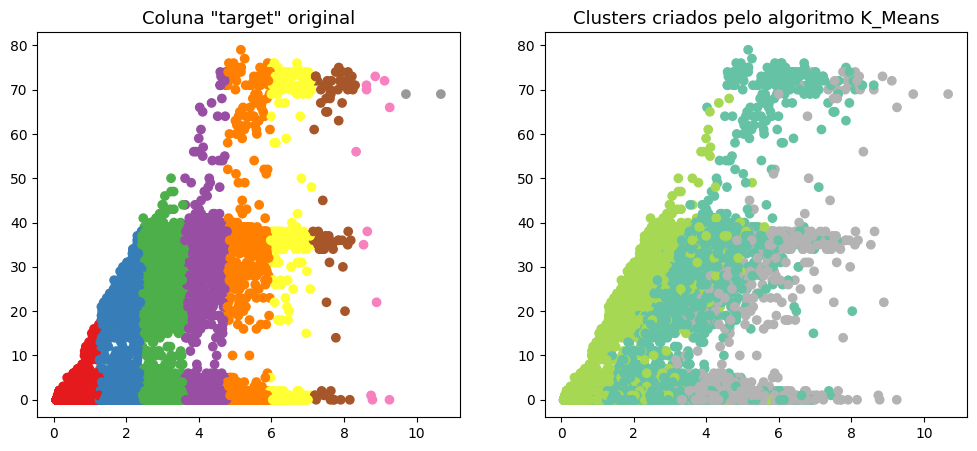

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(dados_teste['Global_active_power'], dados_teste['Sub_metering_2'], c=dados_teste['target'], cmap=plt.cm.Set1)
axes[1].scatter(dados_teste['Global_active_power'], dados_teste['Sub_metering_2'], c=dados_teste['k_means'], cmap=plt.cm.Set2)
axes[0].set_title('Coluna "target" original', fontsize=13)
axes[1].set_title('Clusters criados pelo algoritmo K_Means', fontsize=13)



In [ ]:

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(dados_teste, kmeanModel.labels_)
print(f"Silhouette score: {sil_score:.4f}")


Silhouette score: 0.6852
